In [1]:
#!pip install emoji
import pandas as pd
import emoji
import regex as re
import string 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()


In [2]:
# Read the CSV file into a DataFrame
df = pd.read_csv('good_bad_with_splits_full.csv')
df

,review,labels,split
0,asked chatgpt to explain why fast growing lend...,bad,train
1,building a virtual machine inside chatgpt tco...,bad,train
2,imagining chatgpt but with video input n nin r...,bad,train
3,openai s chatgpt shows why implementation is k...,bad,train
4,google stock don t be afraid of chatgpt nasdaq...,bad,train
...,...,...,...
39995,chatgpt poetry this one is about womenlifefre...,bad,test
39996,taiyo oil sales units floor price nfts blockc...,bad,test
39997,chatgpt doesn t only pass turing s test but wo...,bad,test
39998,chatgpt is an incredible tool but when asked ...,bad,test


In [3]:
import nltk
from nltk.tokenize import word_tokenize
tokenize = lambda x: word_tokenize(x)
df['token'] = df['review'].apply(tokenize)
df

,review,labels,split,token
0,asked chatgpt to explain why fast growing lend...,bad,train,"[asked, chatgpt, to, explain, why, fast, growi..."
1,building a virtual machine inside chatgpt tco...,bad,train,"[building, a, virtual, machine, inside, chatgp..."
2,imagining chatgpt but with video input n nin r...,bad,train,"[imagining, chatgpt, but, with, video, input, ..."
3,openai s chatgpt shows why implementation is k...,bad,train,"[openai, s, chatgpt, shows, why, implementatio..."
4,google stock don t be afraid of chatgpt nasdaq...,bad,train,"[google, stock, don, t, be, afraid, of, chatgp..."
...,...,...,...,...
39995,chatgpt poetry this one is about womenlifefre...,bad,test,"[chatgpt, poetry, this, one, is, about, womenl..."
39996,taiyo oil sales units floor price nfts blockc...,bad,test,"[taiyo, oil, sales, units, floor, price, nfts,..."
39997,chatgpt doesn t only pass turing s test but wo...,bad,test,"[chatgpt, doesn, t, only, pass, turing, s, tes..."
39998,chatgpt is an incredible tool but when asked ...,bad,test,"[chatgpt, is, an, incredible, tool, but, when,..."


In [4]:
from nltk.corpus import stopwords

custom_stopwords = ["tco", "n", "s","q","e","v","u","f","l","g","p","x","c","w","z","chatgpt","j","h","b","ni"]
stopwords_list = stopwords.words('english') + custom_stopwords

def tokenize_and_remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [token for token in tokens if token.lower() not in stopwords_list]
    return filtered_tokens

df["token"] = df["review"].apply(tokenize_and_remove_stopwords)

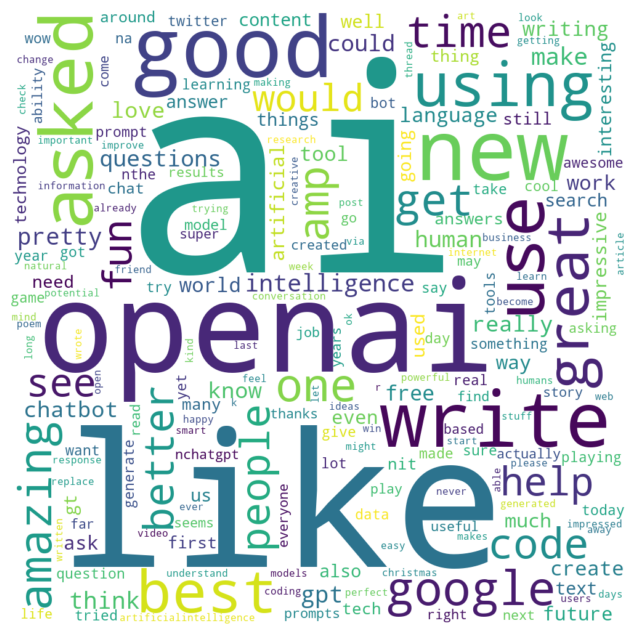

In [5]:
good_df = df[df["labels"] == "good"]

good_tokens = [token for sublist in good_df["token"] for token in sublist]

# Create a dictionary of word frequencies
word_freq = {}
for token in good_tokens:
    if token in word_freq:
        word_freq[token] += 1
    else:
        word_freq[token] = 1

for word in list(word_freq):
    if word_freq[word] > 1:
        word_freq[word] = word_freq[word]**2

# Generate the wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8))
wordcloud = WordCloud(width = 1000, height = 1000, background_color="white").generate_from_frequencies(word_freq)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

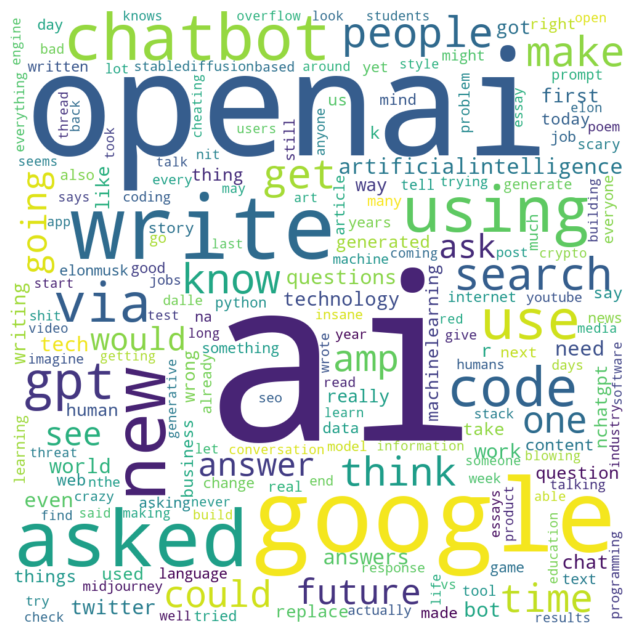

In [6]:
bad_df = df[df["labels"] == "bad"]

bad_tokens = [token for sublist in bad_df["token"] for token in sublist]

# Create a dictionary of word frequencies
word_freq = {}
for token in bad_tokens:
    if token in word_freq:
        word_freq[token] += 1
    else:
        word_freq[token] = 1

for word in list(word_freq):
    if word_freq[word] > 1:
        word_freq[word] = word_freq[word]**2

# Generate the wordcloud

fig, ax = plt.subplots(figsize=(12, 8))
wordcloud = WordCloud(width = 1000, height = 1000, background_color="white").generate_from_frequencies(word_freq)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [7]:
bad_df

,review,labels,split,token
0,asked chatgpt to explain why fast growing lend...,bad,train,"[asked, explain, fast, growing, lenders, often..."
1,building a virtual machine inside chatgpt tco...,bad,train,"[building, virtual, machine, inside, uizlbxv]"
2,imagining chatgpt but with video input n nin r...,bad,train,"[imagining, video, input, nin, real, time, ljf..."
3,openai s chatgpt shows why implementation is k...,bad,train,"[openai, shows, implementation, key, generativ..."
4,google stock don t be afraid of chatgpt nasdaq...,bad,train,"[google, stock, afraid, nasdaq, goog, tnupz]"
...,...,...,...,...
39995,chatgpt poetry this one is about womenlifefre...,bad,test,"[poetry, one, womenlifefreedom, point, qdsajhl..."
39996,taiyo oil sales units floor price nfts blockc...,bad,test,"[taiyo, oil, sales, units, floor, price, nfts,..."
39997,chatgpt doesn t only pass turing s test but wo...,bad,test,"[pass, turing, test, would, also, slide, dms, ..."
39998,chatgpt is an incredible tool but when asked ...,bad,test,"[incredible, tool, asked, code, program, outpu..."


In [8]:
import nltk
lst = []
bad_df = bad_df.reset_index(drop=True)
for i in range(len(bad_df)):
#     print(bad_df['token'][i])
    lst.append(bad_df['token'][i])
# lst    
full = []
for i in range(len(lst)):
    for j in range(len(lst[i])):
        full.append(lst[i][j])

full
text = nltk.Text(full)
# print(token)
text
type(full)

list

In [9]:
text.collocations()

stack overflow; asked write; njoin rlyimpqw; google search; dalle
njoin; rlyimpqw imagine; game changer; elon musk; code red; mind
blowing; stablediffusion dalle; search engine; virtual machine; social
media; temporarily banned; machine inside; gpt stablediffusion; via
youtube; building virtual; chat gpt


In [10]:
fdist = text.vocab()

In [11]:
print(fdist.most_common(80))

[('ai', 4401), ('openai', 2327), ('google', 1458), ('write', 1255), ('asked', 1084), ('new', 1032), ('chatbot', 884), ('using', 869), ('use', 759), ('code', 743), ('via', 742), ('gpt', 701), ('search', 597), ('people', 561), ('know', 552), ('make', 549), ('get', 543), ('think', 528), ('time', 523), ('amp', 499), ('could', 493), ('one', 493), ('future', 464), ('going', 464), ('answer', 439), ('see', 433), ('ask', 429), ('would', 423), ('artificialintelligence', 422), ('answers', 411), ('world', 395), ('need', 395), ('questions', 393), ('bot', 392), ('even', 390), ('twitter', 385), ('tech', 383), ('work', 372), ('chat', 362), ('technology', 357), ('writing', 357), ('got', 356), ('first', 354), ('r', 337), ('like', 332), ('really', 326), ('way', 325), ('wrong', 315), ('question', 313), ('k', 312), ('things', 307), ('replace', 305), ('nchatgpt', 304), ('used', 304), ('thing', 300), ('human', 299), ('take', 298), ('generated', 296), ('machinelearning', 292), ('content', 286), ('business', 2

In [12]:
import nltk
lst = []
good_df = good_df.reset_index(drop=True)
for i in range(len(good_df)):
#     print(bad_df['token'][i])
    lst.append(bad_df['token'][i])
# lst    
full = []
for i in range(len(lst)):
    for j in range(len(lst[i])):
        full.append(lst[i][j])

full
text = nltk.Text(full)
# print(token)
text
type(full)

list

In [13]:
fdist = text.vocab()

In [14]:
print(fdist.most_common(80))

[('ai', 4401), ('openai', 2327), ('google', 1458), ('write', 1255), ('asked', 1084), ('new', 1032), ('chatbot', 884), ('using', 869), ('use', 759), ('code', 743), ('via', 742), ('gpt', 701), ('search', 597), ('people', 561), ('know', 552), ('make', 549), ('get', 543), ('think', 528), ('time', 523), ('amp', 499), ('could', 493), ('one', 493), ('future', 464), ('going', 464), ('answer', 439), ('see', 433), ('ask', 429), ('would', 423), ('artificialintelligence', 422), ('answers', 411), ('world', 395), ('need', 395), ('questions', 393), ('bot', 392), ('even', 390), ('twitter', 385), ('tech', 383), ('work', 372), ('chat', 362), ('technology', 357), ('writing', 357), ('got', 356), ('first', 354), ('r', 337), ('like', 332), ('really', 326), ('way', 325), ('wrong', 315), ('question', 313), ('k', 312), ('things', 307), ('replace', 305), ('nchatgpt', 304), ('used', 304), ('thing', 300), ('human', 299), ('take', 298), ('generated', 296), ('machinelearning', 292), ('content', 286), ('business', 2

In [15]:
text.concordance(["elonmusk"])

Displaying 25 of 220 matches:
dqunaelw best project launched eth elonmusk post us ndon forget guys erc opena
lled traditional education rwvjiqz elonmusk nenjoy mr musk aemiexenp real gtfo
ttention ai beyond gbfyj openai ai elonmusk dalle artificialintelligence art i
views controversial strange answer elonmusk gydf pfivi technology artificialin
e writing softwares one day openai elonmusk midjourney openai gpt stablediffus
 ai future ndesigning dalle coding elonmusk uay lubdek building virtual machin
if google search bing try happened elonmusk openai wd fxh tkx pop culture pred
 asked openai create funny insults elonmusk nno harsh feelings elonmusk kcjovq
nsults elonmusk nno harsh feelings elonmusk kcjovqqgug apps similar writesonic
lligence jh ncf daily dose spoiler elonmusk appears news short amp poor story 
essay could generate nzykgxew long elonmusk going make openai make ai answer d
rtunately ukraine fight without ai elonmusk wrong ry sjezr econtwitter rstats 
english ovhdk gqt aski

## Topic modeling

### Good reviews

In [16]:
good_df

,review,labels,split,token
0,honestly openai chatgpt has to be one of the b...,good,train,"[honestly, openai, one, best, ai, tool, ever, ..."
1,are you a polyglot how many programminglanguag...,good,train,"[polyglot, many, programminglanguages, good, t..."
2,free startup idea nwikihow generator n nenter ...,good,train,"[free, startup, idea, nwikihow, generator, nen..."
3,give credit where credit is due nice n nmy ins...,good,train,"[give, credit, credit, due, nice, nmy, inspira..."
4,the thing with chatgpt and using it for produc...,good,train,"[thing, using, production, whether, computer, ..."
...,...,...,...,...
19995,on chatgpt and stevejobs and how to grow obsol...,good,test,"[stevejobs, grow, obsolete, grace, wow, gvdngx..."
19996,world changing how to talk to a computer tco ...,good,test,"[world, changing, talk, computer, ob, uzjkprv,..."
19997,chatgpt is amazing,good,test,[amazing]
19998,late to the party but tested chatgpt today aft...,good,test,"[late, party, tested, today, email, garyvee, t..."


In [17]:
good_text = good_df['token'].tolist()

In [18]:
import gensim
from gensim import corpora
good_dictionary = corpora.Dictionary(good_text)
corpus = [good_dictionary.doc2bow(text) for text in good_text]

In [19]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=good_dictionary,
                                            num_topics=10, 
                                            random_state=100,
                                            iterations = 1000,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha='auto',
                                            per_word_topics=True)

In [20]:
# Print the topics and their top words
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.052*"amp" + 0.023*"twitter" + 0.019*"thanks" + 0.019*"day" + 0.017*"cool" + 0.017*"post" + 0.017*"let" + 0.014*"bot" + 0.014*"learning" + 0.013*"nft"
Topic: 1 
Words: 0.028*"code" + 0.026*"help" + 0.023*"chatbot" + 0.019*"even" + 0.018*"future" + 0.018*"language" + 0.013*"got" + 0.012*"technology" + 0.011*"ability" + 0.010*"tools"
Topic: 2 
Words: 0.072*"ai" + 0.040*"like" + 0.036*"openai" + 0.018*"good" + 0.017*"write" + 0.016*"asked" + 0.015*"use" + 0.015*"using" + 0.013*"one" + 0.013*"best"
Topic: 3 
Words: 0.035*"new" + 0.024*"amazing" + 0.019*"get" + 0.019*"make" + 0.018*"better" + 0.017*"questions" + 0.017*"fun" + 0.015*"ask" + 0.015*"know" + 0.015*"really"
Topic: 4 
Words: 0.036*"people" + 0.032*"gpt" + 0.029*"human" + 0.029*"intelligence" + 0.024*"way" + 0.024*"artificial" + 0.024*"much" + 0.018*"many" + 0.015*"generate" + 0.015*"nchatgpt"
Topic: 5 
Words: 0.052*"love" + 0.042*"answer" + 0.027*"life" + 0.021*"useful" + 0.020*"away" + 0.015*"poem" + 0.013*"sol

In [21]:
bad_text = bad_df['token'].tolist()

In [22]:
bad_dictionary = corpora.Dictionary(bad_text)
corpus = [bad_dictionary.doc2bow(text) for text in bad_text]

In [23]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=bad_dictionary,
                                            num_topics=10, 
                                            random_state=100,
                                            iterations = 1000,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha='auto',
                                            per_word_topics=True)

In [24]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.029*"amp" + 0.021*"need" + 0.020*"work" + 0.019*"twitter" + 0.016*"nchatgpt" + 0.015*"replace" + 0.014*"right" + 0.014*"asking" + 0.013*"seo" + 0.013*"took"
Topic: 1 
Words: 0.060*"using" + 0.047*"use" + 0.028*"questions" + 0.021*"already" + 0.019*"day" + 0.018*"job" + 0.018*"many" + 0.015*"wrote" + 0.015*"trying" + 0.011*"knows"
Topic: 2 
Words: 0.041*"write" + 0.039*"asked" + 0.037*"new" + 0.020*"code" + 0.019*"know" + 0.013*"bot" + 0.010*"writing" + 0.010*"take" + 0.010*"things" + 0.010*"r"
Topic: 3 
Words: 0.041*"question" + 0.031*"everyone" + 0.028*"next" + 0.025*"check" + 0.023*"crazy" + 0.022*"users" + 0.021*"talking" + 0.019*"someone" + 0.018*"shit" + 0.017*"response"
Topic: 4 
Words: 0.026*"going" + 0.025*"get" + 0.022*"make" + 0.022*"time" + 0.022*"see" + 0.021*"would" + 0.017*"artificialintelligence" + 0.016*"ask" + 0.016*"like" + 0.015*"even"
Topic: 5 
Words: 0.036*"tech" + 0.036*"answers" + 0.033*"us" + 0.028*"human" + 0.022*"internet" + 0.018*"week" + 0